# 06 Insurance Draft

# Introduction

Football is believed to have originated in China in the third century BC. It is the world’s most popular ball game in number of players and spectators. Football is a game in which two teams of 11 players, use any part of their bodies except their hands and arms to maneuver the ball into the opposing team’s goal. Only the goalkeeper is permitted to use his hands and may do so only within the penalty area surrounding the goal. The team that scores the most goals wins. The standard length of a game is 90 minutes with a short break, known as "half time," at the 45-minute mark. Only America and Canada call the sport soccer.

European football clubs operate as independent entities that are typically owned by a group of investors or a single owner. They are generally organized into leagues, which are typically organized at the national level. For example, in England, there is the Premier League, in Spain there is La Liga, in Germany there is the Bundesliga, and so on. Within each league, teams compete against each other over the course of a season. At the end of the season, the team with the most points become the champions of the league.

In addition to competing in their national leagues, European football clubs also compete in a variety of other competitions, including international club competitions like the UEFA Champions League and Europa League, as well as domestic cup competitions.

Revenue for professional football clubs in Europe comes from a variety of sources, including ticket sales, merchandising, and broadcast rights. The largest and most successful clubs are often able to generate significant revenue through these channels, which allows them to attract top talent and remain competitive both domestically and internationally.

Football’s governing body is the Fédération Internationale de Football Association (FIFA). 

# Goal

In this report, I analyze the data of the Ultimate 25k+ Matches Football Database (European) from Kaggle to determine if there are ways to gain an advantage in classifying the outcome of a game for purposes of betting.

# Technical Requirements

1. Perform Data cleaning, exploratory data analysis and feature engineering.
2. Use parameters that gives the most important statistical insights into the data.
3. Create visualizations.
4. Perform statistical inferences and hypothesis testing. Set appropriate significance levels and create confidence intervals for the variables of interest.
5. Apply linear machine learning models and use them for forecasting. 
6. Use cross-validation, information criteria, and other methods to specify correct modeling.
7. Choose and use appropriate metrics to measure models' performances.
8. Provide clear explanations. 
9. Provide conclusions and suggest how the analysis can be improved.

# Standards

Below is a summary of the standards I followed and my assumptions related to this project. 

>* **Standard 1:** My standard for an acceptable accuracy Score for wins is 75%. <BR>

# Biases

Below is the biases I identified while creating this report.

>* **Bias 1:** Clear data about each player in the team is not part of this data set. Some of the data seems made up and unreliable. 
>* **Bias 2:** Clear data about each team is not part of this data set. Some of the data seems made up and unreliable.

# Domain Knowledge

I have no expertise in football. There may be parts of the data that I have overlooked that may have been most important and I may have given importance to parts of the data that may have had little significance. 

# Libraries

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.utils import shuffle


import warnings
import shap
import optuna
import logging
import tqdm

warnings.filterwarnings("ignore")
optuna.logging.set_verbosity(optuna.logging.WARNING)

## Display Features

In [202]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

## Colors

In [203]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"
color_10 = "beige"
color_11 = "coral"
color_13 = "grey"
color_14 = "tan"
color_15 = "wheat"
color_16 = "tomato"

## Figure Parameters

In [204]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Load Data

In [205]:
insurance = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Insurance\\DataSet\\Insurance.csv",
    index_col=0,
)

# Data Overview and Preprocessing

In [206]:
insurance = insurance.rename(
    columns={
        "Employment Type": "EmploymentType",
        "GraduateOrNot": "Graduate",
        "EverTravelledAbroad": "TravelledAbroad",
    }
)

In [207]:
insurance.head()

,Age,EmploymentType,Graduate,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,TravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [61]:
insurance.shape[0]

1987

In [62]:
insurance.isnull().sum(axis=0)

Age                0
EmploymentType     0
Graduate           0
AnnualIncome       0
FamilyMembers      0
ChronicDiseases    0
FrequentFlyer      0
TravelledAbroad    0
TravelInsurance    0
dtype: int64

In [63]:
insurance.count()

Age                1987
EmploymentType     1987
Graduate           1987
AnnualIncome       1987
FamilyMembers      1987
ChronicDiseases    1987
FrequentFlyer      1987
TravelledAbroad    1987
TravelInsurance    1987
dtype: int64

In [64]:
insurance.dtypes

Age                 int64
EmploymentType     object
Graduate           object
AnnualIncome        int64
FamilyMembers       int64
ChronicDiseases     int64
FrequentFlyer      object
TravelledAbroad    object
TravelInsurance     int64
dtype: object

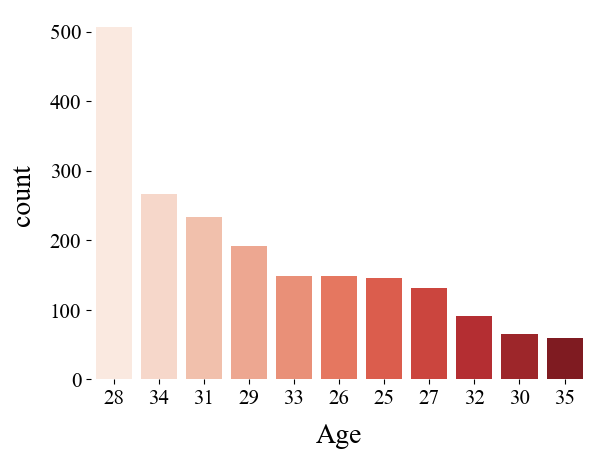

In [129]:
plt.rcParams.update(params)

sns.countplot(
    x="Age",
    data=insurance,
    palette="Reds",
    order=insurance["Age"].value_counts().index,
)

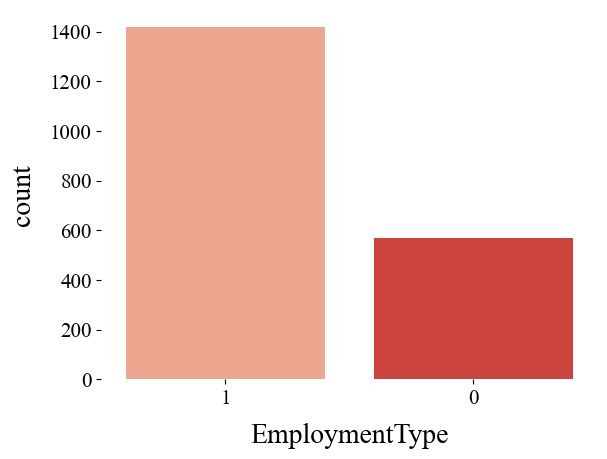

In [130]:
plt.rcParams.update(params)

sns.countplot(
    x="EmploymentType",
    data=insurance,
    palette="Reds",
    order=insurance["EmploymentType"].value_counts().index,
)

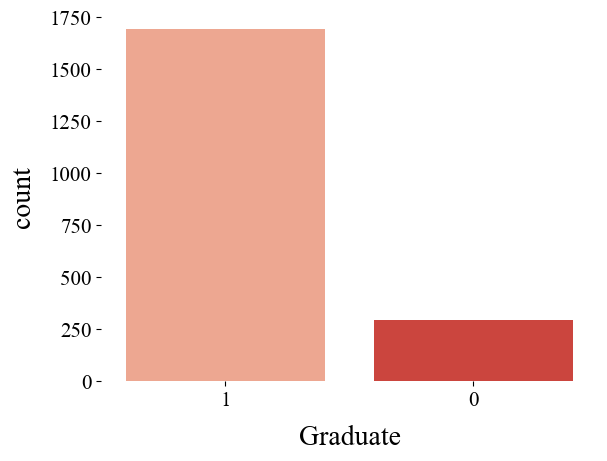

In [131]:
plt.rcParams.update(params)

sns.countplot(
    x="Graduate",
    data=insurance,
    palette="Reds",
    order=insurance["Graduate"].value_counts().index,
)

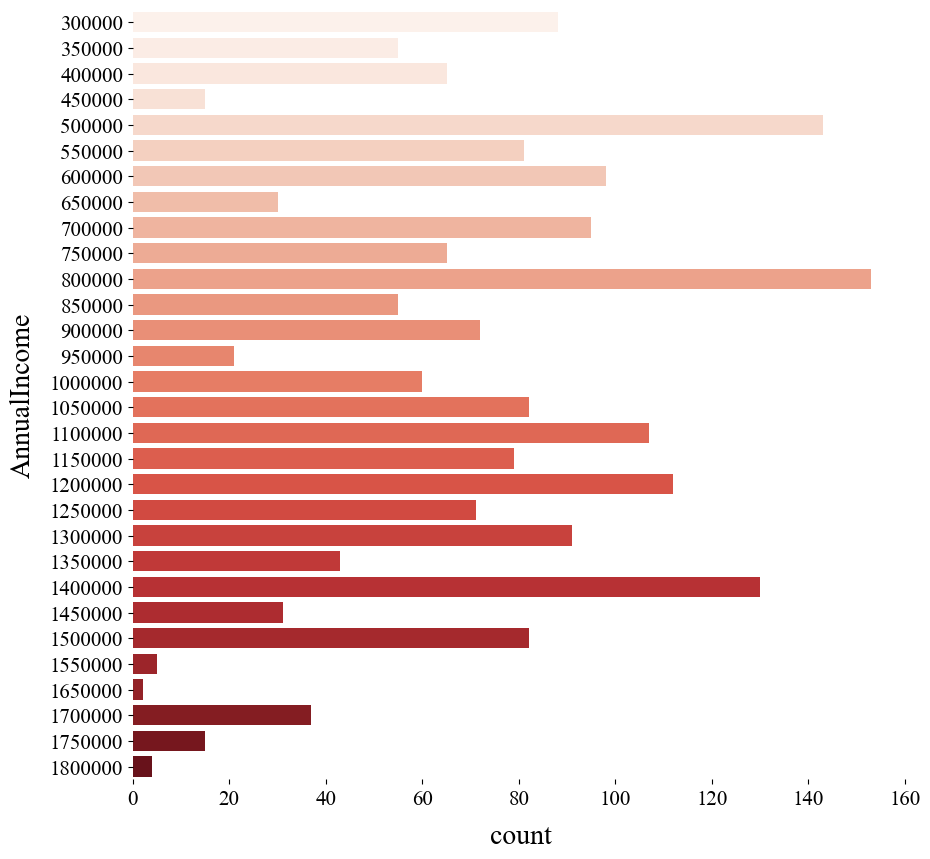

In [133]:
plt.rcParams.update(params)

plt.figure(figsize=(10, 10))
sns.countplot(y="AnnualIncome", data=insurance, palette="Reds")

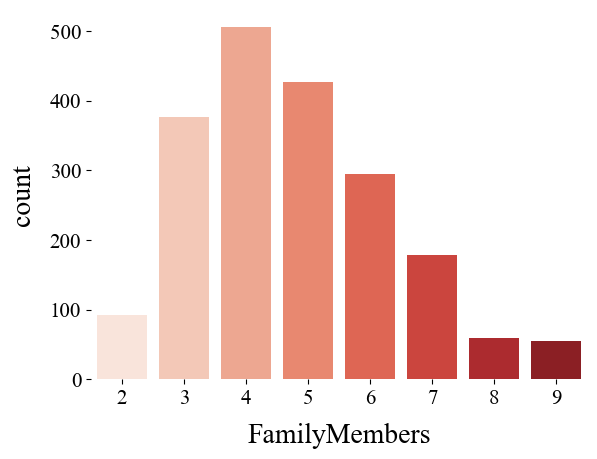

In [134]:
plt.rcParams.update(params)

sns.countplot(x="FamilyMembers", data=insurance, palette="Reds")

<Axes: xlabel='ChronicDiseases', ylabel='count'>

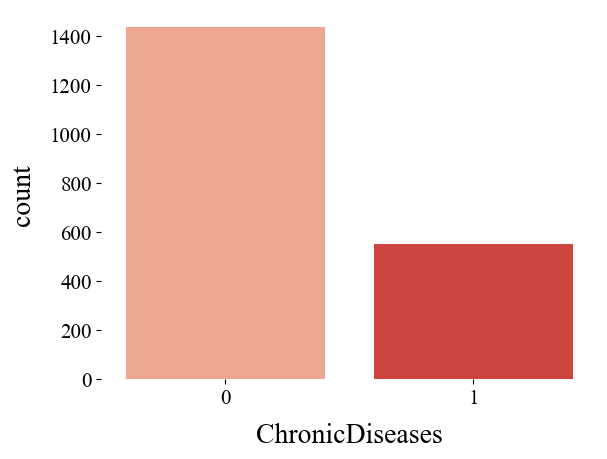

In [135]:
plt.rcParams.update(params)

sns.countplot(x="ChronicDiseases", data=insurance, palette="Reds")

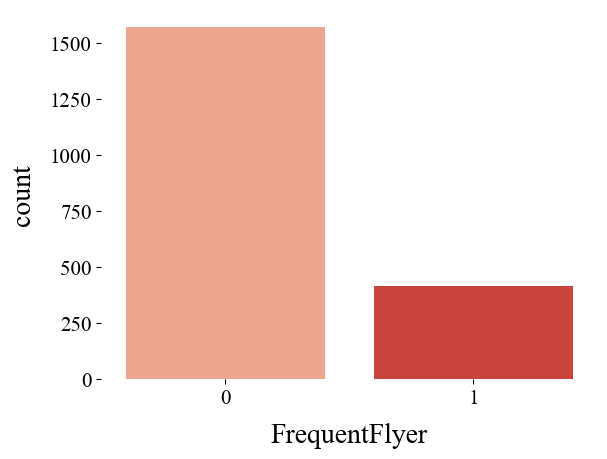

In [136]:
plt.rcParams.update(params)

sns.countplot(x="FrequentFlyer", data=insurance, palette="Reds")

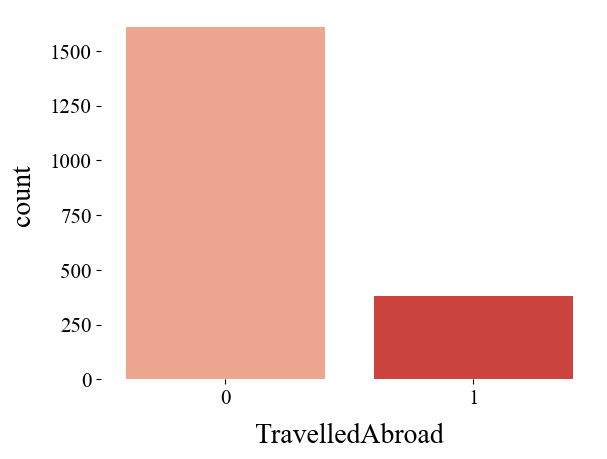

In [137]:
plt.rcParams.update(params)

sns.countplot(x="TravelledAbroad", data=insurance, palette="Reds")

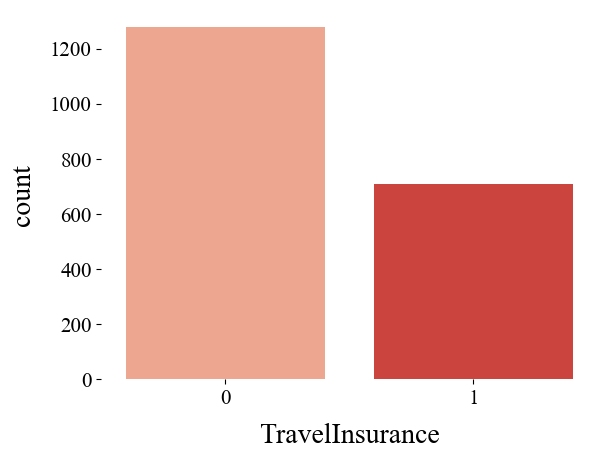

In [139]:
plt.rcParams.update(params)

sns.countplot(
    x="TravelInsurance",
    data=insurance,
    palette="Reds",
    order=insurance["TravelInsurance"].value_counts().index,
)

# Correlations

In [142]:
def create_heatmap(data, title):
    """
    Creates a Seaborn heatmap.
    """

    plt.rcParams.update(params)
    corr = data.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    f, ax = plt.subplots(figsize=(10, 15))

    cmap = sns.diverging_palette(230, 10, as_cmap=True)
    heatmap = sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=1,
        vmin=-1,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
        annot=True,
    )

    heatmap.set_title(
        title,
        fontdict={"fontsize": size},
        pad=12,
    )
    plt.xlabel("")
    plt.ylabel("")

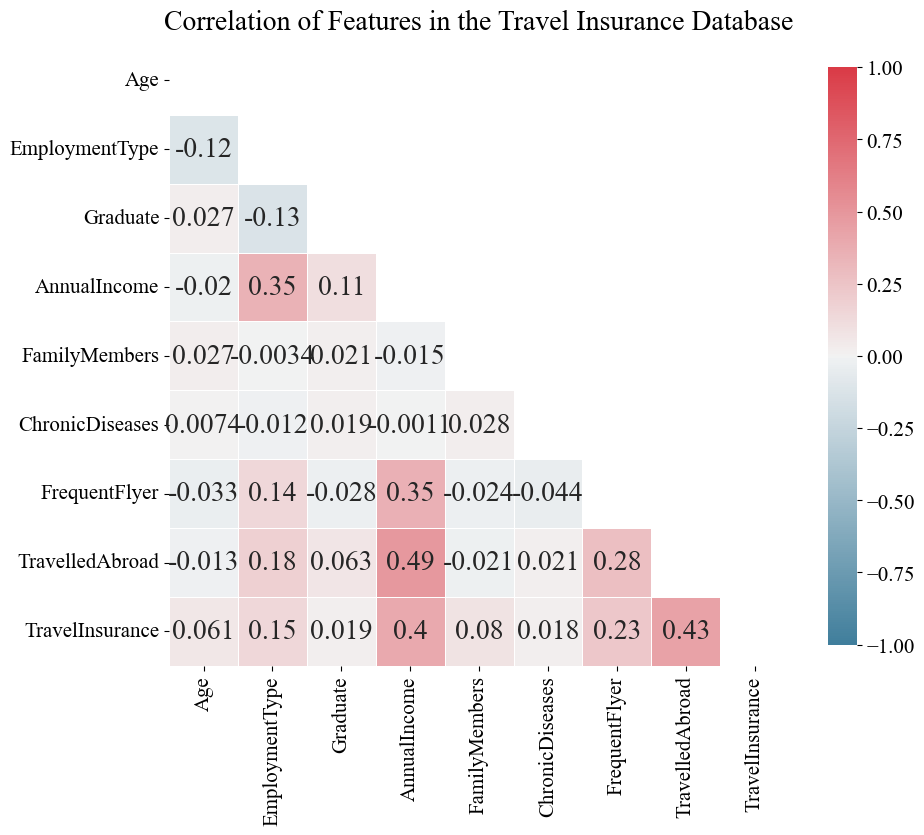

In [143]:
data = insurance
title = "Correlation of Features in the Travel Insurance Database"
create_heatmap(data, title)

In [144]:
corr_matrix = insurance.corr(numeric_only=True)
corr_matrix["TravelInsurance"].sort_values(ascending=False)

TravelInsurance    1.000000
TravelledAbroad    0.433183
AnnualIncome       0.396763
FrequentFlyer      0.232103
EmploymentType     0.147847
FamilyMembers      0.079909
Age                0.061060
Graduate           0.018934
ChronicDiseases    0.018190
Name: TravelInsurance, dtype: float64

# Machine Learning

In [286]:
label_encoder = LabelEncoder()
obj = insurance.dtypes == "object"

for col in list(obj[obj].index):
    insurance[col] = label_encoder.fit_transform(insurance[col])

In [287]:
X = insurance.drop("TravelInsurance", axis=1)
y = insurance["TravelInsurance"]

In [288]:
X, y = shuffle(X, y, random_state=None)

In [289]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Logistic Regression

In [292]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Assuming your data is in two arrays X and y
# Creating a logistic regression model
model = LogisticRegression()

# Defining the number of folds for k-fold cross-validation
k = 10

# Creating a k-fold cross-validation object
kf = KFold(n_splits=k)

# Performing k-fold cross-validation and calculating the mean score
scores = cross_val_score(model, X, y, cv=kf)
mean_score = scores.mean()

In [293]:
mean_score

0.6426754987056496

In [212]:
logisticregression = LogisticRegression()
logisticregression.fit(X_train, y_train)

LogisticRegression()

In [213]:
y_predict = logisticregression.predict(X_test)

In [214]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       250
           1       0.00      0.00      0.00       148

    accuracy                           0.63       398
   macro avg       0.31      0.50      0.39       398
weighted avg       0.39      0.63      0.48       398



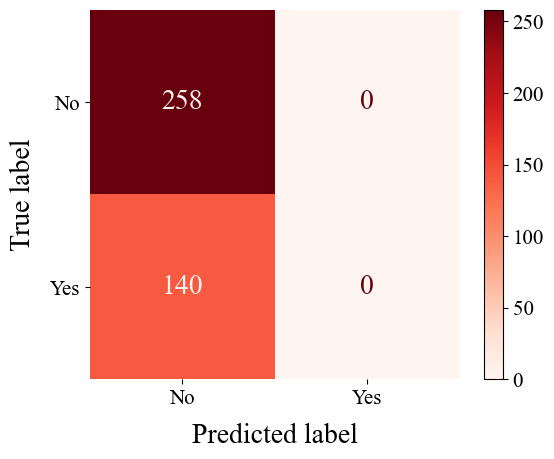

In [283]:
plt.rcParams.update(params)

plot_confusion_matrix(logisticregression, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

# Decision Tree

In [218]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

In [219]:
y_predict = decisiontree.predict(X_test)

In [220]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       250
           1       0.73      0.57      0.64       148

    accuracy                           0.76       398
   macro avg       0.75      0.73      0.73       398
weighted avg       0.76      0.76      0.76       398



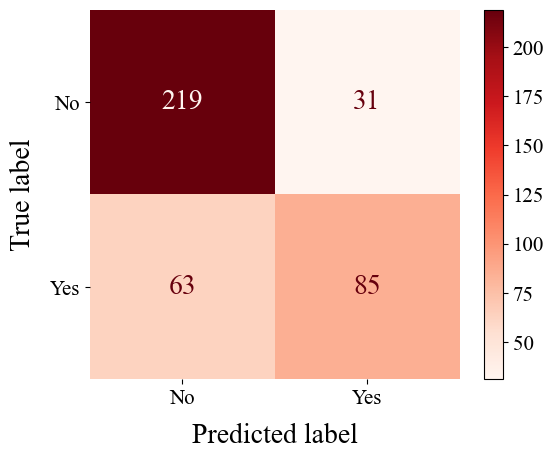

In [221]:
plot_confusion_matrix(decisiontree, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

# KNN

In [222]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [223]:
y_predict = knn.predict(X_test)

In [224]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       250
           1       0.88      0.57      0.69       148

    accuracy                           0.81       398
   macro avg       0.83      0.76      0.78       398
weighted avg       0.82      0.81      0.80       398



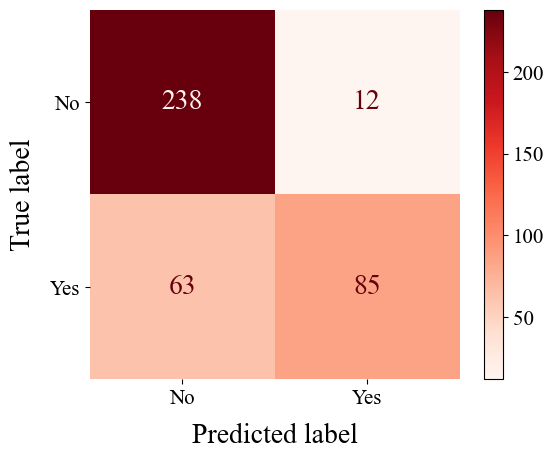

In [225]:
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

# KNN with SHAP

100%|████████████████████████████████████████████████████████████████████████████████| 398/398 [00:10<00:00, 36.29it/s]


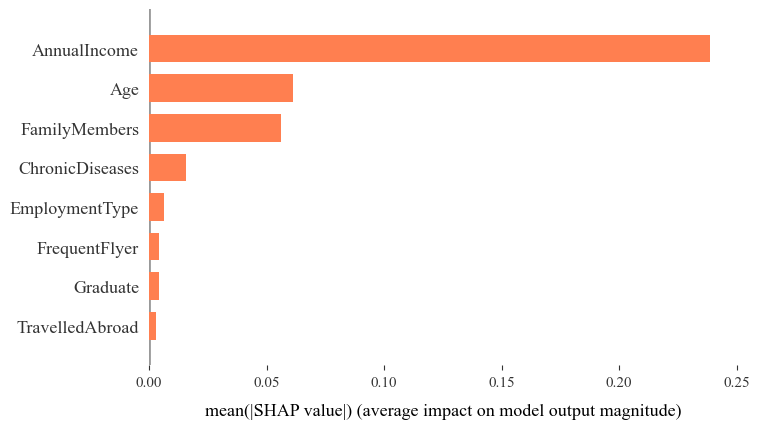

In [69]:
sampled_X = shap.sample(X, 100)

explainer = shap.KernelExplainer(knn.predict_proba, sampled_X)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[0], X_test, plot_type="bar", color=color_11)
plt.show()

In [226]:
X = insurance[["AnnualIncome", "Age", "FamilyMembers"]]
y = insurance["TravelInsurance"]

In [227]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

In [228]:
knn_shap = KNeighborsClassifier()
knn_shap.fit(X_train, y_train)

KNeighborsClassifier()

In [229]:
y_predict = knn_shap.predict(X_test)

In [230]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       258
           1       0.80      0.62      0.70       140

    accuracy                           0.81       398
   macro avg       0.81      0.77      0.78       398
weighted avg       0.81      0.81      0.81       398



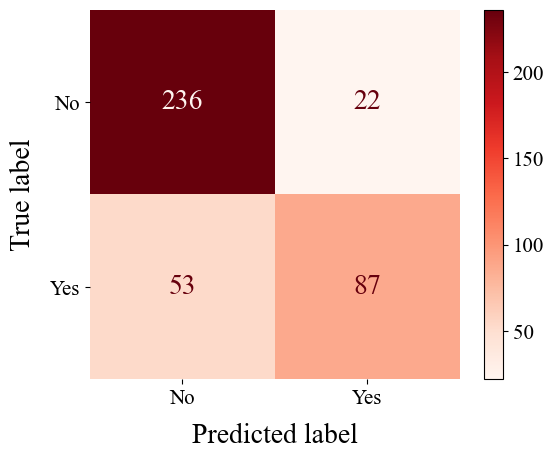

In [232]:
plot_confusion_matrix(knn_shap, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

# KNN with Optuna

In [233]:
X = insurance.drop("TravelInsurance", axis=1)
y = insurance["TravelInsurance"]

In [234]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

In [235]:
def knn_optuna_objective(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 3, 20)
    p = trial.suggest_int("p", 1, 2)

    model = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)

    return accuracy

In [236]:
knn_study = optuna.create_study(direction="maximize")
knn_study.optimize(knn_optuna_objective, n_trials=100)

In [237]:
print(f"Best accuracy score: {knn_study.best_value:.5f}")
print("Best hyperparameters:")
for key, value in knn_study.best_params.items():
    print(f"\t{key}: {value}")

Best accuracy score: 0.82663
Best hyperparameters:
	n_neighbors: 10
	p: 2


In [238]:
knn_best_params = knn_study.best_params
knn_optuna = KNeighborsClassifier(
    n_neighbors=knn_best_params["n_neighbors"], p=knn_best_params["p"]
)
knn_optuna.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [239]:
y_predict = knn_optuna.predict(X_test)

In [240]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       258
           1       0.92      0.56      0.69       140

    accuracy                           0.83       398
   macro avg       0.86      0.77      0.79       398
weighted avg       0.84      0.83      0.81       398



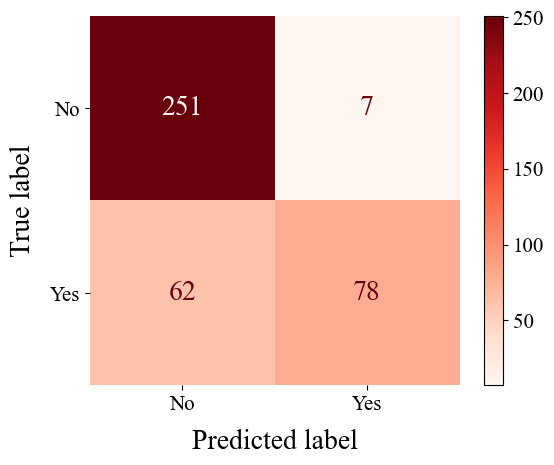

In [241]:
plot_confusion_matrix(knn_optuna, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

# Decision Tree with Optuna

In [242]:
X = insurance.drop("TravelInsurance", axis=1)
y = insurance["TravelInsurance"]

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [244]:
def decisiontree_optuna_objective(trial):

    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    splitter = trial.suggest_categorical("splitter", ["best", "random"])
    max_depth = trial.suggest_int("max_depth", 1, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=0,
    )
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)

    return accuracy

In [245]:
decisiontree_study = optuna.create_study(direction="maximize")
decisiontree_study.optimize(decisiontree_optuna_objective, n_trials=100)

In [246]:
print(f"Best Accuracy Score: {decisiontree_study.best_value:.5f}")
print("Best hyperparameters:")
for key, value in decisiontree_study.best_params.items():
    print(f"\t{key}: {value}")

Best Accuracy Score: 0.82412
Best hyperparameters:
	criterion: entropy
	splitter: best
	max_depth: 14
	min_samples_split: 8
	min_samples_leaf: 10


In [247]:
decisiontree_best_params = decisiontree_study.best_params

decisiontree_optuna = DecisionTreeClassifier(
    criterion=decisiontree_best_params["criterion"],
    splitter=decisiontree_best_params["splitter"],
    max_depth=decisiontree_best_params["max_depth"],
    min_samples_split=decisiontree_best_params["min_samples_split"],
    min_samples_leaf=decisiontree_best_params["min_samples_leaf"],
    random_state=0,
)
decisiontree_optuna.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=10,
                       min_samples_split=8, random_state=0)

In [248]:
y_predict = decisiontree_optuna.predict(X_test)

In [249]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       258
           1       0.93      0.54      0.68       140

    accuracy                           0.82       398
   macro avg       0.86      0.76      0.78       398
weighted avg       0.84      0.82      0.81       398



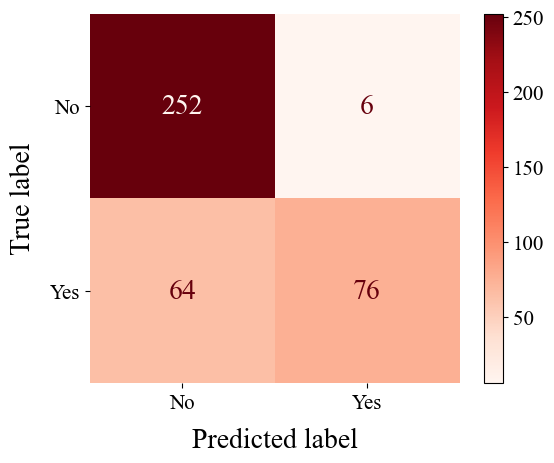

In [250]:
plot_confusion_matrix(decisiontree_optuna, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

# Logistic Regression with Optuna

In [251]:
X = insurance.drop("TravelInsurance", axis=1)
y = insurance["TravelInsurance"]

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [256]:
def logisticregression_optuna_objective(trial):

    penalty = trial.suggest_categorical("penalty", ["none", "l2"])
    C = trial.suggest_loguniform("C", 1e-5, 10)
    solver = trial.suggest_categorical("solver", ["newton-cg", "lbfgs", "sag", "saga"])

    model = LogisticRegression(penalty=penalty, C=C, solver=solver)

    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)

    return accuracy

In [257]:
logisticregression_study = optuna.create_study(direction="maximize")
logisticregression_study.optimize(logisticregression_optuna_objective, n_trials=100)

In [258]:
best_params = logisticregression_study.best_params
print(f"Best Accuracy Score: {logisticregression_study.best_value:.5f}")
print("Best hyperparameters:", best_params)

Best Accuracy Score: 0.79648
Best hyperparameters: {'penalty': 'l2', 'C': 0.04064055801554106, 'solver': 'newton-cg'}


In [259]:
logisticregression_optuna = LogisticRegression(**best_params)
logisticregression_optuna.fit(X_train, y_train)

LogisticRegression(C=0.04064055801554106, solver='newton-cg')

In [260]:
y_predict = logisticregression_optuna.predict(X_test)

In [261]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       258
           1       0.86      0.50      0.63       140

    accuracy                           0.80       398
   macro avg       0.82      0.73      0.75       398
weighted avg       0.81      0.80      0.78       398



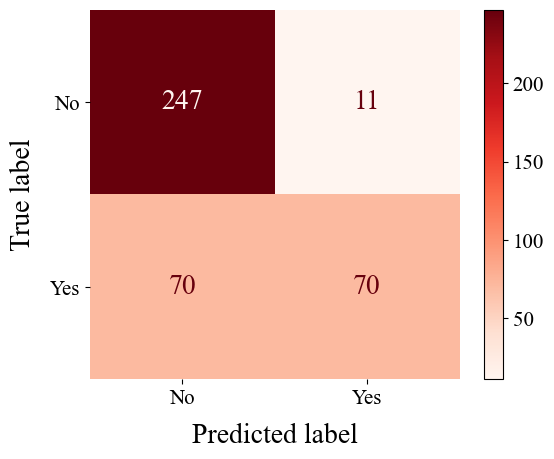

In [262]:
plot_confusion_matrix(logisticregression_optuna, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

# Stacking Classifier

In [189]:
X = insurance.drop("TravelInsurance", axis=1)
y = insurance["TravelInsurance"]

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [264]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()

estimators = [("lr", model1), ("knn", model2), ("dt", model3)]
stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [265]:
stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [266]:
y_predict = stacking_clf.predict(X_test)

In [267]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       258
           1       0.82      0.63      0.71       140

    accuracy                           0.82       398
   macro avg       0.82      0.78      0.79       398
weighted avg       0.82      0.82      0.82       398



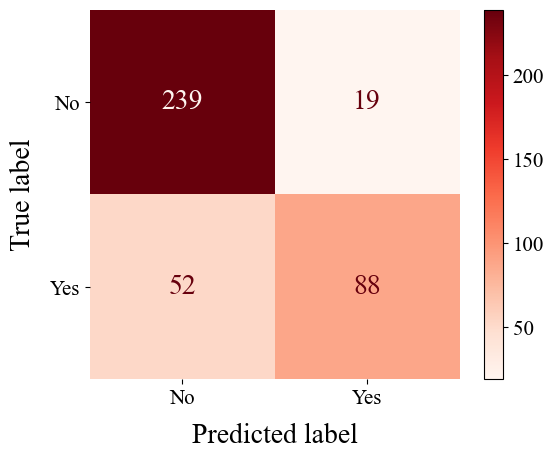

In [268]:
plot_confusion_matrix(stacking_clf, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

# Soft Voting Classifier

In [269]:
X = insurance.drop("TravelInsurance", axis=1)
y = insurance["TravelInsurance"]

In [270]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

In [271]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()

soft_voting_clf = VotingClassifier(
    estimators=[("lr", model1), ("rf", model2), ("svc", model3)], voting="soft"
)
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', KNeighborsClassifier()),
                             ('svc', DecisionTreeClassifier())],
                 voting='soft')

In [272]:
y_predict = soft_voting_clf.predict(X_test)

In [273]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       258
           1       0.71      0.64      0.67       140

    accuracy                           0.78       398
   macro avg       0.76      0.75      0.75       398
weighted avg       0.78      0.78      0.78       398



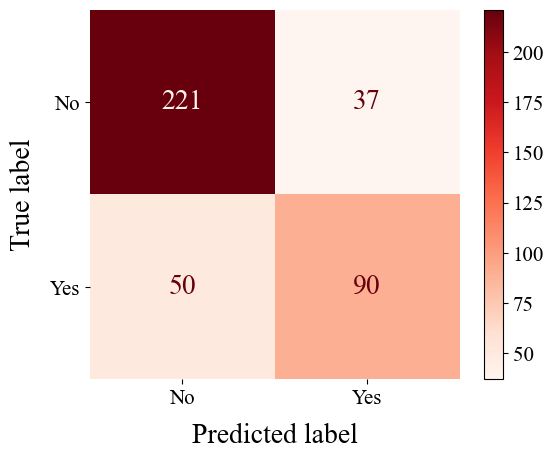

In [275]:
plot_confusion_matrix(soft_voting_clf, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"])

# Hard Voting Classifier

In [276]:
X = insurance.drop("TravelInsurance", axis=1)
y = insurance["TravelInsurance"]

In [277]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

In [278]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()

hard_voting_clf = VotingClassifier(
    estimators=[("lr", model1), ("rf", model2), ("svc", model3)], voting="hard"
)
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', KNeighborsClassifier()),
                             ('svc', DecisionTreeClassifier())])

In [279]:
y_predict = hard_voting_clf.predict(X_test)

In [280]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       258
           1       0.87      0.56      0.68       140

    accuracy                           0.82       398
   macro avg       0.83      0.76      0.78       398
weighted avg       0.82      0.82      0.81       398



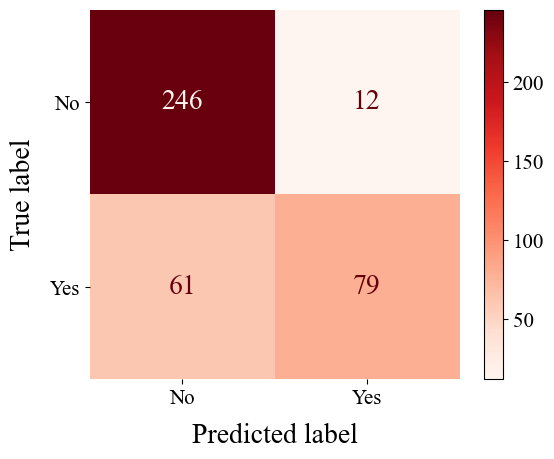

In [281]:
plot_confusion_matrix(hard_voting_clf, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);